In [946]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder,PolynomialFeatures
import random
random.seed(42)
np.random.seed(40)
%matplotlib inline



In [947]:
Bloodbank = pd.read_csv('bb2.csv')
BBT= pd.read_csv('Book1.csv')
print(Bloodbank.columns)


Index(['Sr No', ' Blood Bank Name', ' State', ' District', ' City', ' Address',
       'Pincode', ' Contact No', ' Mobile', ' Helpline', ' Fax', ' Email',
       ' Website', ' Nodal Officer ', ' Contact Nodal Officer',
       ' Mobile Nodal Officer', ' Email Nodal Officer',
       ' Qualification Nodal Officer', ' Type', ' Blood Component Available',
       ' Apheresis', ' Service Time', ' License #', ' Date License Obtained',
       ' Date of Renewal', ' Latitude', ' Longitude'],
      dtype='object')


In [948]:
Bloodbank.head()

,Sr No,Blood Bank Name,State,District,City,Address,Pincode,Contact No,Mobile,Helpline,...,Qualification Nodal Officer,Type,Blood Component Available,Apheresis,Service Time,License #,Date License Obtained,Date of Renewal,Latitude,Longitude
0,1,G.B. Pant Hospital Blood bank,Andaman And Nicobar Islands,SOUTH ANDAMAN,Port Blair,Atlanta Point\r\nNear Cellular Jail\r\nP.O. Ab...,744104,03192 230628,9434266561,102,...,NaN,Government,YES,NO,24X7,DL1/CLAA/ANI,14.6.1996,01.01.2012,11.675442,92.747338
1,2,I.N.H.S. Dhanvantri,Andaman And Nicobar Islands,SOUTH ANDAMAN,Port Blair,"Ashvini Nagar, Port Blair, Andaman and Nicobar...",744103,03192 248759,8001452200,NaN,...,"MBBS, MD (Pathology)",Government,NO,NO,24X7,DL2/CLAA/ANI,14.06.1996,31.12.2016,11.649693,92.717418
2,3,Pillar Health Centre Blood Bank,Andaman And Nicobar Islands,SOUTH ANDAMAN,Port Blair,"Lamba Line,\r\nP.B. 526,\r\nP.O. Junglighat, \...",744104,"03192 233193, 03192 233993",9474247585,03192 233193,...,"MBBS, MD (Medicine)",Charity,NO,NO,24X7,DL3/CLAA/ANI,08.09.2010,10.06.2015,11.653229,92.730714
3,4,"Indian Red Cross Society Blood Bank, District ...",Andhra Pradesh,ANANTAPUR,Anantapur,"Near JNTU Engeneering College, Sarada Nagar, A...",515002,08554 246344,9441192365,NaN,...,"MBBS, MD, DCP",Charity,YES,NO,24x7,13/ATP/AP/2005/BB/R,22.11.2005,21.11.2015,14.654936,77.609915
4,5,Government General Hospital Blood Bank,Andhra Pradesh,ANANTAPUR,Ananthapur,"Government General Hospital, Ananthapur",515001,08554 275024,9866695858,NaN,...,"MBBS, MD (Pathology)",Government,YES,NO,24x7,50/ATP/AP/97/BB/R,28.01.1997,01.01.2013,14.671459,77.596684


In [949]:
print("dimension of Bloodbank data: {}".format(Bloodbank.shape))
print("dimension of BloodbankTamilnadu data: {}".format(BBT.shape))

dimension of Bloodbank data: (2823, 27)
dimension of BloodbankTamilnadu data: (291, 28)


In [950]:
Bloodbank.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sr No                         2823 non-null   int64  
 1    Blood Bank Name              2823 non-null   object 
 2    State                        2823 non-null   object 
 3    District                     2822 non-null   object 
 4    City                         2803 non-null   object 
 5    Address                      2754 non-null   object 
 6   Pincode                       2651 non-null   object 
 7    Contact No                   2524 non-null   object 
 8    Mobile                       2148 non-null   object 
 9    Helpline                     206 non-null    object 
 10   Fax                          491 non-null    object 
 11   Email                        1557 non-null   object 
 12   Website                      584 non-null    object 
 13   No

In [951]:
Bloodbank.describe()


,Sr No,Latitude,Longitude
count,2823.00000,2823.000000,2823.000000
mean,1412.00000,17.981589,68.188802
std,815.07423,9.302901,27.198724
min,1.00000,0.000000,0.000000
25%,706.50000,12.130980,74.229210
50%,1412.00000,19.215794,77.072134
75%,2117.50000,25.535837,79.853760
max,2823.00000,40.267194,96.101627


In [952]:
Bloodbank.isnull().sum()


Sr No                              0
 Blood Bank Name                   0
 State                             0
 District                          1
 City                             20
 Address                          69
Pincode                          172
 Contact No                      299
 Mobile                          675
 Helpline                       2617
 Fax                            2332
 Email                          1266
 Website                        2239
 Nodal Officer                   586
 Contact Nodal Officer          1515
 Mobile Nodal Officer            683
 Email Nodal Officer             832
 Qualification Nodal Officer     972
 Type                             79
 Blood Component Available       418
 Apheresis                       768
 Service Time                    402
 License #                       594
 Date License Obtained           698
 Date of Renewal                 680
 Latitude                          0
 Longitude                         0
d

In [953]:
Bloodbank.isnull().sum() / Bloodbank.shape[0] * 100

Sr No                            0.000000
 Blood Bank Name                 0.000000
 State                           0.000000
 District                        0.035423
 City                            0.708466
 Address                         2.444208
Pincode                          6.092809
 Contact No                     10.591569
 Mobile                         23.910733
 Helpline                       92.702798
 Fax                            82.607156
 Email                          44.845909
 Website                        79.312788
 Nodal Officer                  20.758059
 Contact Nodal Officer          53.666312
 Mobile Nodal Officer           24.194120
 Email Nodal Officer            29.472193
 Qualification Nodal Officer    34.431456
 Type                            2.798441
 Blood Component Available      14.806943
 Apheresis                      27.205101
 Service Time                   14.240170
 License #                      21.041445
 Date License Obtained          24

In [954]:
category = Bloodbank.select_dtypes(include='object')
numerical = Bloodbank.select_dtypes(exclude='object')
num=BBT.select_dtypes(exclude='object')

In [955]:
for col in category.columns:
    print(f"{col}")
    print(category[col].unique())
    print()
    


 Blood Bank Name
['G.B. Pant Hospital Blood bank' 'I.N.H.S. Dhanvantri'
 'Pillar Health Centre Blood Bank' ...
 'Deben Mahato (Sadar) Hospital Blood Bank'
 'Sub Divisional Hospital Blood Bank Islampur'
 'Raiganj Blood Bank, Uttar Dinajpur Raiganj District Hospital']

 State
['Andaman And Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Daman and Diu' 'Delhi' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu and Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep'
 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland'
 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Telangana' 'Tripura' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']

 District
['SOUTH ANDAMAN' 'ANANTAPUR' 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KRISHNA'
 'KURNOOL' 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATNAM'
 'VIZIANAGARAM' 'WEST GODAVARI' 'Y.S.R. (Kadapa)' 'CHANGLANG' 'EAST SIANG'
 'LOHIT' 'LOW

In [956]:
for n in numerical.columns:
    print(n)

Sr No
 Latitude
 Longitude


In [957]:
categorical = [  ' Blood Bank Name', ' State', ' District', ' City',
       'Pincode', ' Contact No', ' Mobile', ' Helpline', ' Fax', ' Email',
       ' Website', ' Nodal Officer ', ' Contact Nodal Officer',
       ' Mobile Nodal Officer', ' Email Nodal Officer', 'Type',
       ' Blood Component Available', ' Service Time',
       ' License #', ' Date License Obtained', ' Date of Renewal']

 Blood Component Available,(yes/no)


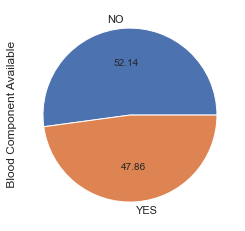

 Type (gov,pvt,charity)


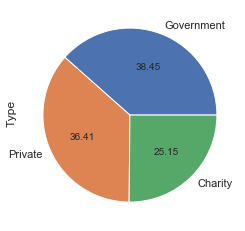

In [958]:
    print(' Blood Component Available,(yes/no)')
    Bloodbank[' Blood Component Available'].value_counts().plot(kind='pie', autopct="%.2f")
    plt.show()
    print(' Type (gov,pvt,charity)')
    Bloodbank[' Type'].value_counts().plot(kind='pie', autopct="%.2f")
    plt.show() 
   
   
    

 Blood banks in states 


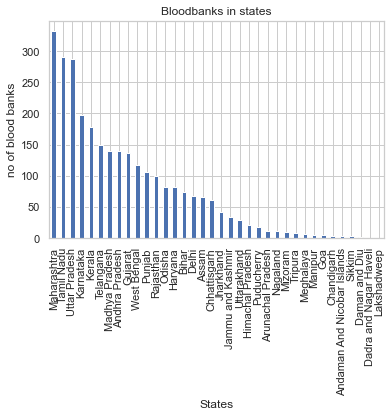

In [959]:
    print(' Blood banks in states ')
    Bloodbank[' State'].value_counts().plot(kind='bar')
    plt.title("Bloodbanks in states")
    plt.xlabel('States')
    plt.ylabel('no of blood banks')
    plt.show()
   

In [960]:
BBT.head()


,Sr No,Blood Bank Name,State,District,City,Address,Pincode,Contact No,Mobile,Helpline,...,Type,Blood Component Available,Apheresis,Service Time,License #,Date License Obtained,Year of Renewal,Latitude,Longitude,Renewal target
0,1,Government Head quarters Hospital,Tamil Nadu,Ariyalur,Ariyalur,"Perambalur Road, Ariyalur",621704,NaN,NaN,NaN,...,Government,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN
1,2,CANCER INSTITUTE HOSPITAL BLOOD BANK,Tamil Nadu,Chennai,Adyar,"Cancer Institute (WIA) ,No.18 Sardar Patel road",600036,"044 22209150,044 24/754,044 22350241",NaN,NaN,...,Charity,YES,YES,24/7,126,5/13/1997,NaN,13.005335,80.239623,NaN
2,3,Rajiv Gandhi Government General Hospital,Tamil Nadu,Chennai,Chennai,"General Hospital Road\r\nPark Town,\r\nChennai...",600003,"044 25305711, 044 2530 5000",9436120190,NaN,...,Government,YES,YES,24/7,36/28c,NaN,NaN,13.081279,80.27678,NaN
3,4,The Institute of Child Health and Hospital for...,Tamil Nadu,Chennai,Chennai,"Halls Road, Egmore, Chennai",600008,044 28191132 044 2819 2138,"09445142097, 09941173095",NaN,...,Government,YES,NO,24/7,115/28c,31-03-1997,2012.0,13.072798,80.258257,2021.0
4,5,Government Kilpauk Medical College Hospital Bl...,Tamil Nadu,Chennai,Chennai,Government Kilpauk Medical College and Hospita...,600010,044 28364955,9941242840,NaN,...,Government,YES,NO,24/7,116/28c,NaN,2012.0,13.078315,80.243824,NaN


Tamil Nadu


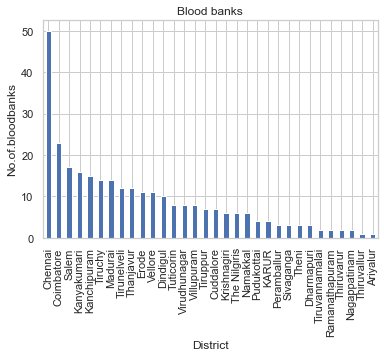

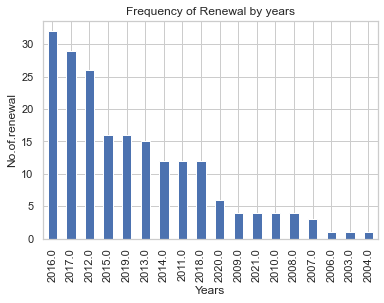

In [961]:
    print('Tamil Nadu')
    BBT[' District'].value_counts().plot(kind='bar')
    plt.title("Blood banks")
    plt.xlabel('District')
    plt.ylabel('No.of.bloodbanks')
    plt.show()
    BBT[' Year of Renewal'].value_counts().plot(kind='bar')
    plt.title("Frequency of Renewal by years")
    plt.xlabel('Years')
    plt.ylabel('No.of.renewal')
    plt.show()
   
    

In [962]:
num.columns

Index([' Year of Renewal', 'Renewal target'], dtype='object')

In [963]:
numerical.columns

Index(['Sr No', ' Latitude', ' Longitude'], dtype='object')

<AxesSubplot:title={'center':'Target vs Actual Productivity(in years)'}, xlabel=' District'>

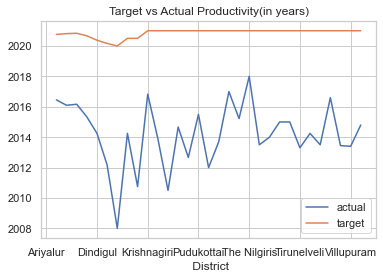

In [964]:

PROD =BBT.groupby(' District').agg(actual = (' Year of Renewal','mean'), target = ('Renewal target', 'mean'))
PROD.plot(kind='line', title="Target vs Actual Productivity(in years)")

In [965]:
BBT.drop(['Sr No', ' Blood Bank Name',' City', ' Address',
       'Pincode', ' Contact No', ' Mobile', ' Helpline', ' Fax', ' Email',
       ' Website', ' Nodal Officer ', ' Contact Nodal Officer',
       ' Mobile Nodal Officer', ' Email Nodal Officer',
       ' Qualification Nodal Officer',
       ' Apheresis', ' Service Time', ' License #',' Date License Obtained',' Latitude', ' Longitude'], axis = 1, inplace = True)



In [966]:
BBT.tail()


,State,District,Type,Blood Component Available,Year of Renewal,Renewal target
286,Tamil Nadu,Virudhunagar,Charity,NaN,NaN,NaN
287,Tamil Nadu,Virudhunagar,Government,NO,NaN,NaN
288,Tamil Nadu,Virudhunagar,Charity,NaN,NaN,NaN
289,Tamil Nadu,Virudhunagar,Charity,NO,2016.0,2021.0
290,Tamil Nadu,Virudhunagar,Government,NO,2012.0,2021.0


In [967]:
BBT.dtypes

 State                         object
 District                      object
 Type                          object
 Blood Component Available     object
 Year of Renewal              float64
Renewal target                float64
dtype: object

In [968]:
BBT.isnull().sum()

 State                         0
 District                      0
 Type                          0
 Blood Component Available    31
 Year of Renewal              93
Renewal target                86
dtype: int64

In [969]:
BBT

,State,District,Type,Blood Component Available,Year of Renewal,Renewal target
0,Tamil Nadu,Ariyalur,Government,NaN,NaN,NaN
1,Tamil Nadu,Chennai,Charity,YES,NaN,NaN
2,Tamil Nadu,Chennai,Government,YES,NaN,NaN
3,Tamil Nadu,Chennai,Government,YES,2012.0,2021.0
4,Tamil Nadu,Chennai,Government,YES,2012.0,NaN
...,...,...,...,...,...,...
286,Tamil Nadu,Virudhunagar,Charity,NaN,NaN,NaN
287,Tamil Nadu,Virudhunagar,Government,NO,NaN,NaN
288,Tamil Nadu,Virudhunagar,Charity,NaN,NaN,NaN
289,Tamil Nadu,Virudhunagar,Charity,NO,2016.0,2021.0


In [970]:
BBT.dropna(inplace=True)

In [971]:
TBT=BBT

In [972]:
TBT

,State,District,Type,Blood Component Available,Year of Renewal,Renewal target
3,Tamil Nadu,Chennai,Government,YES,2012.0,2021.0
7,Tamil Nadu,Chennai,Private,YES,2017.0,2021.0
8,Tamil Nadu,Chennai,Private,YES,2020.0,2021.0
9,Tamil Nadu,Chennai,Private,YES,2017.0,2021.0
10,Tamil Nadu,Chennai,Private,YES,2016.0,2021.0
...,...,...,...,...,...,...
283,Tamil Nadu,Virudhunagar,Government,NO,2016.0,2021.0
284,Tamil Nadu,Virudhunagar,Government,NO,2016.0,2021.0
285,Tamil Nadu,Virudhunagar,Private,NO,2014.0,2021.0
289,Tamil Nadu,Virudhunagar,Charity,NO,2016.0,2021.0


In [973]:

#TBT[' Type']=TBT[' Type'].astype(str)
#TBT[' District']=TBT[' District'].astype(str)
#TBT[' Blood Component Available ']=TBT[' Blood Component Available'].astype(str)
#TBT=pd.get_dummies(TBT)

#TBT.head()

In [974]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[' Blood Component Available']=le.fit_transform(TBT[' Blood Component Available'])
df[' Blood Component Available']

0      1
1      1
2      1
3      1
4      1
      ..
192    0
193    0
194    0
195    0
196    0
Name:  Blood Component Available, Length: 197, dtype: int32

In [975]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[' Type']=le.fit_transform(TBT[' Type'])
df[' Type']

0      1
1      2
2      2
3      2
4      2
      ..
192    1
193    1
194    2
195    0
196    1
Name:  Type, Length: 197, dtype: int32

In [976]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[' District']=le.fit_transform(TBT[' District'])
df[' District']

0       0
1       0
2       0
3       0
4       0
       ..
192    30
193    30
194    30
195    30
196    30
Name:  District, Length: 197, dtype: int32

In [977]:
df

,Blood Component Available,Type,District
0,1,1,0
1,1,2,0
2,1,2,0
3,1,2,0
4,1,2,0
...,...,...,...
192,0,1,30
193,0,1,30
194,0,2,30
195,0,0,30


In [978]:
TBT

,State,District,Type,Blood Component Available,Year of Renewal,Renewal target
3,Tamil Nadu,Chennai,Government,YES,2012.0,2021.0
7,Tamil Nadu,Chennai,Private,YES,2017.0,2021.0
8,Tamil Nadu,Chennai,Private,YES,2020.0,2021.0
9,Tamil Nadu,Chennai,Private,YES,2017.0,2021.0
10,Tamil Nadu,Chennai,Private,YES,2016.0,2021.0
...,...,...,...,...,...,...
283,Tamil Nadu,Virudhunagar,Government,NO,2016.0,2021.0
284,Tamil Nadu,Virudhunagar,Government,NO,2016.0,2021.0
285,Tamil Nadu,Virudhunagar,Private,NO,2014.0,2021.0
289,Tamil Nadu,Virudhunagar,Charity,NO,2016.0,2021.0


In [979]:
TBT.reset_index(drop=True, inplace=True)
TBT

,State,District,Type,Blood Component Available,Year of Renewal,Renewal target
0,Tamil Nadu,Chennai,Government,YES,2012.0,2021.0
1,Tamil Nadu,Chennai,Private,YES,2017.0,2021.0
2,Tamil Nadu,Chennai,Private,YES,2020.0,2021.0
3,Tamil Nadu,Chennai,Private,YES,2017.0,2021.0
4,Tamil Nadu,Chennai,Private,YES,2016.0,2021.0
...,...,...,...,...,...,...
192,Tamil Nadu,Virudhunagar,Government,NO,2016.0,2021.0
193,Tamil Nadu,Virudhunagar,Government,NO,2016.0,2021.0
194,Tamil Nadu,Virudhunagar,Private,NO,2014.0,2021.0
195,Tamil Nadu,Virudhunagar,Charity,NO,2016.0,2021.0


In [980]:
ABT=pd.concat([TBT,df],axis=1)

In [981]:
ABT

,State,District,Type,Blood Component Available,Year of Renewal,Renewal target,Blood Component Available,Type,District
0,Tamil Nadu,Chennai,Government,YES,2012.0,2021.0,1,1,0
1,Tamil Nadu,Chennai,Private,YES,2017.0,2021.0,1,2,0
2,Tamil Nadu,Chennai,Private,YES,2020.0,2021.0,1,2,0
3,Tamil Nadu,Chennai,Private,YES,2017.0,2021.0,1,2,0
4,Tamil Nadu,Chennai,Private,YES,2016.0,2021.0,1,2,0
...,...,...,...,...,...,...,...,...,...
192,Tamil Nadu,Virudhunagar,Government,NO,2016.0,2021.0,0,1,30
193,Tamil Nadu,Virudhunagar,Government,NO,2016.0,2021.0,0,1,30
194,Tamil Nadu,Virudhunagar,Private,NO,2014.0,2021.0,0,2,30
195,Tamil Nadu,Virudhunagar,Charity,NO,2016.0,2021.0,0,0,30


In [982]:
ABT.columns

Index([' State', ' District', ' Type', ' Blood Component Available',
       ' Year of Renewal', 'Renewal target', ' Blood Component Available',
       ' Type', ' District'],
      dtype='object')

In [983]:
column_numbers = [x for x in range(ABT.shape[1])]  

column_numbers .remove(1) 
column_numbers.remove(2)
column_numbers.remove(3)
column_numbers.remove(6)
ABT=ABT.iloc[:, column_numbers] 
ABT

,State,Year of Renewal,Renewal target,Type,District
0,Tamil Nadu,2012.0,2021.0,1,0
1,Tamil Nadu,2017.0,2021.0,2,0
2,Tamil Nadu,2020.0,2021.0,2,0
3,Tamil Nadu,2017.0,2021.0,2,0
4,Tamil Nadu,2016.0,2021.0,2,0
...,...,...,...,...,...
192,Tamil Nadu,2016.0,2021.0,1,30
193,Tamil Nadu,2016.0,2021.0,1,30
194,Tamil Nadu,2014.0,2021.0,2,30
195,Tamil Nadu,2016.0,2021.0,0,30


In [984]:
 
#column_numbers = [x for x in range(TBT.shape[1])]  


#column_numbers .remove(40) 
#column_numbers.remove(41)

#TBT.iloc[:, column_numbers]

In [985]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale  = [' Year of Renewal','Renewal target']
min_max_scaler = MinMaxScaler()
ABT[cols_to_scale] = min_max_scaler.fit_transform(ABT[cols_to_scale])
ABT

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,State,Year of Renewal,Renewal target,Type,District
0,Tamil Nadu,0.500000,1.0,1,0
1,Tamil Nadu,0.777778,1.0,2,0
2,Tamil Nadu,0.944444,1.0,2,0
3,Tamil Nadu,0.777778,1.0,2,0
4,Tamil Nadu,0.722222,1.0,2,0
...,...,...,...,...,...
192,Tamil Nadu,0.722222,1.0,1,30
193,Tamil Nadu,0.722222,1.0,1,30
194,Tamil Nadu,0.611111,1.0,2,30
195,Tamil Nadu,0.722222,1.0,0,30


In [986]:
numer = ABT.select_dtypes(exclude='object')


In [987]:
numer

,Year of Renewal,Renewal target,Type,District
0,0.500000,1.0,1,0
1,0.777778,1.0,2,0
2,0.944444,1.0,2,0
3,0.777778,1.0,2,0
4,0.722222,1.0,2,0
...,...,...,...,...
192,0.722222,1.0,1,30
193,0.722222,1.0,1,30
194,0.611111,1.0,2,30
195,0.722222,1.0,0,30


<AxesSubplot:>

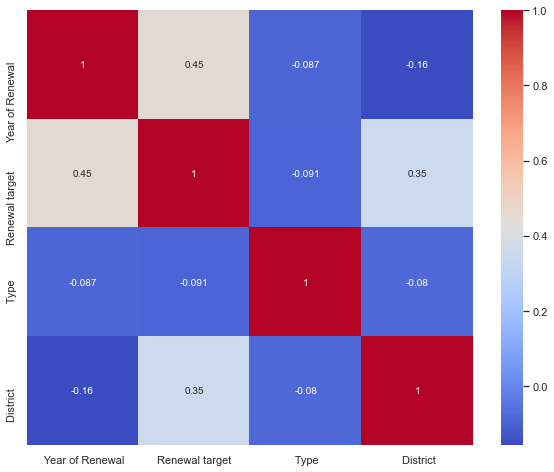

In [988]:
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(ABT.corr(), annot = True, ax = ax,  cmap = 'coolwarm')

In [989]:
#myfig, myax = plt.subplots(nrows = 3, figsize=(8, 8))
#for i in range(3):
 #   numer[numer[' District']==i]['Renewal done(2019 to 2021)'].plot.line(title = 'District'+str(i)+' productivity',ax = myax[i])

#plt.show()


In [990]:
x, y = numer.drop([' Year of Renewal'], axis=1), numer[' Year of Renewal']

In [991]:
#x, y = TBT.drop(['Renewal done(2019 to 2021)'], axis=1), TBT['Renewal done(2019 to 2021)']

In [992]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(x_train.shape)

(137, 3)


In [993]:
input_shape =4

In [994]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
# Creating an estimator
ridge = Ridge()
# Creating RFE object 
rfe = RFE(estimator = ridge, n_features_to_select = input_shape, verbose = 1)
# Fitting the training data into our model
rfe.fit(x_train, y_train)
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('Renewal target', True, 1), (' Type', True, 1), (' District', True, 1)]

In [995]:
RFE_ridge_support_columns = x_train.columns[rfe.support_]
RFE_ridge_support_columns

Index(['Renewal target', ' Type', ' District'], dtype='object')

In [996]:
x_train = x_train[RFE_ridge_support_columns]
x_train.head()
# Preparing a new dataset containing only the RFE support columns data
x_test = x_test[RFE_ridge_support_columns]
x_test.head()

,Renewal target,Type,District
96,1.0,2,9
5,1.0,2,0
116,1.0,0,13
35,1.0,0,1
179,1.0,1,28


In [997]:
from sklearn import metrics
models_metrics = pd.DataFrame(columns = [ 'models','mae','mse', 'rmse' ,'mape', 'R2'])
def evaluate_model(model,Y_actual,Y_Predicted, df1): 
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    mae=metrics.mean_absolute_error(Y_actual, Y_Predicted)
    mse=metrics.mean_squared_error(Y_actual, Y_Predicted)
    rmse=np.sqrt(metrics.mean_squared_error(Y_actual, Y_Predicted))
    r2 = metrics.r2_score(Y_actual, Y_Predicted)
    df2 = {'models':model,'mae':mae,'mse':mse, 'rmse':rmse, 'mape':mape, 'R2': r2}
    df1 = df1.append(df2, ignore_index = True)
    return df1

In [998]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [999]:
# Building a model
model_linear = LinearRegression()
model_linear.fit(x_train,y_train)
#Prediction using test set 
y_linear_pred = model_linear.predict(x_test)
models_metrics = evaluate_model('Linear Regression', y_test, y_linear_pred, models_metrics)

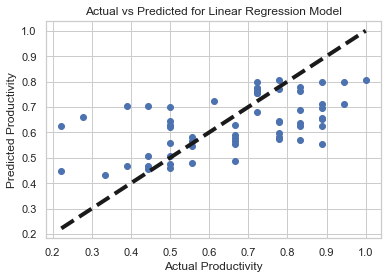

In [1000]:
plt.scatter(y_test, y_linear_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted for Linear Regression Model")
plt.show()

In [1001]:
model_ridge = Ridge()
model_ridge.fit(x_train,y_train)
#Prediction using test set 
y_ridge_pred = model_ridge.predict(x_test)
# Checking with metrics
models_metrics = evaluate_model('Ridge Regression', y_test, y_ridge_pred, models_metrics)

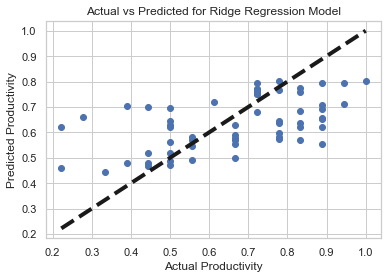

In [1002]:
plt.scatter(y_test, y_ridge_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted for Ridge Regression Model")
plt.show()

In [1003]:
models_metrics

,models,mae,mse,rmse,mape,R2
0,Linear Regression,0.128629,0.026078,0.161487,23.599696,0.279621
1,Ridge Regression,0.129176,0.026216,0.161915,23.774694,0.275793


In [1004]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
# help(PolynomialFeatures)
# help(Pipeline)

In [1005]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
# Doing a polynomial regression: Comparing linear, quadratic and cubic fits
# Pipeline helps you associate two models or objects to be built sequentially with each other, 
# in this case, the objects are PolynomialFeatures() and LinearRegression()

pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=2)),
                     ('model', LinearRegression())])
pipeline.fit(x_train, y_train)
y_pred_degree2 = pipeline.predict(x_test)
models_metrics = evaluate_model('Polynomial Degree 2', y_test, y_pred_degree2, models_metrics)
    
pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=3)),
                     ('model', LinearRegression())])
pipeline.fit(x_train, y_train)
y_pred_degree3 = pipeline.predict(x_test)
models_metrics = evaluate_model('Polynomial Degree 3', y_test, y_pred_degree3, models_metrics)

pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=4)),
                     ('model', LinearRegression())])
pipeline.fit(x_train, y_train)
y_pred_degree4 = pipeline.predict(x_test)
models_metrics = evaluate_model('Polynomial Degree 4', y_test, y_pred_degree4, models_metrics)

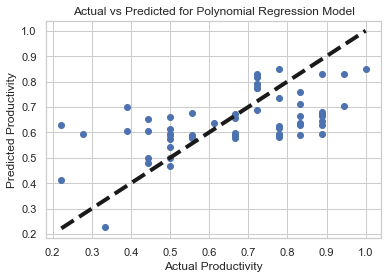

In [1006]:
plt.scatter(y_test, y_pred_degree3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted for Polynomial Regression Model")
plt.show()


In [1007]:
model_svr = SVR(C=25)
model_svr.fit(x_train, y_train)
y_svr_pred = model_svr.predict(x_test)
# model_svr.score(x2_test, y2_test)
models_metrics = evaluate_model('Support Vector Regression', y_test, y_svr_pred, models_metrics)

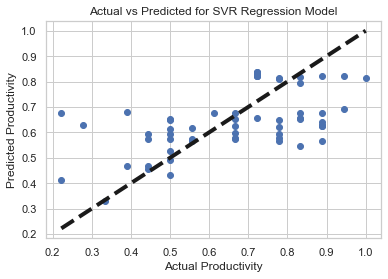

In [1008]:
plt.scatter(y_test, y_svr_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted for SVR Regression Model")
plt.show()

In [1009]:
model_kn = KNeighborsRegressor()
model_kn.fit(x_train, y_train)
y_kn_pred = model_kn.predict(x_test)
models_metrics = evaluate_model('KNeighbour Regression def', y_test, y_kn_pred, models_metrics)

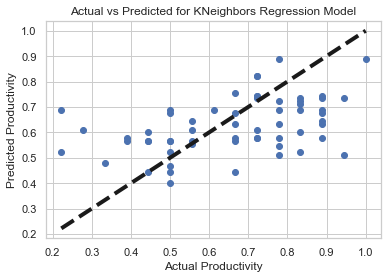

In [1010]:
plt.scatter(y_test, y_kn_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted for KNeighbors Regression Model")
plt.show()


In [1011]:
model_lasso = Lasso()
model_lasso.fit(x_train,y_train)
#Prediction using test set 
y_lasso_pred = model_lasso.predict(x_test)
models_metrics = evaluate_model('Lasso Regression', y_test, y_lasso_pred, models_metrics)

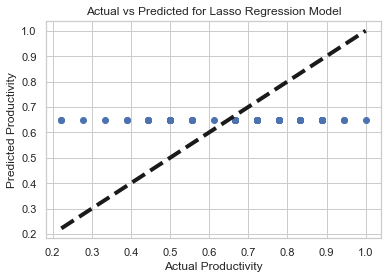

In [1012]:
plt.scatter(y_test, y_lasso_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted for Lasso Regression Model")
plt.show()

In [1013]:
from sklearn.linear_model import PoissonRegressor
pipeline_poisson = Pipeline([('model', PoissonRegressor())])
pipeline_poisson.fit(x_train, y_train)
y_pred_poisson = pipeline_poisson.predict(x_test)
models_metrics = evaluate_model('Poisson Regression', y_test, y_pred_poisson, models_metrics)
models_metrics

,models,mae,mse,rmse,mape,R2
0,Linear Regression,0.128629,0.026078,0.161487,23.599696,0.279621
1,Ridge Regression,0.129176,0.026216,0.161915,23.774694,0.275793
2,Polynomial Degree 2,0.128100,0.024270,0.155788,22.811872,0.329569
3,Polynomial Degree 3,0.129457,0.024774,0.157398,23.602663,0.315640
4,Polynomial Degree 4,0.152682,0.042763,0.206792,28.932906,-0.181291
5,Support Vector Regression,0.127901,0.026037,0.161360,22.985381,0.280747
6,KNeighbour Regression def,0.142593,0.030601,0.174931,26.044935,0.154680
7,Lasso Regression,0.163517,0.036412,0.190819,31.232854,-0.005844
8,Poisson Regression,0.159966,0.036106,0.190017,30.413907,0.002592


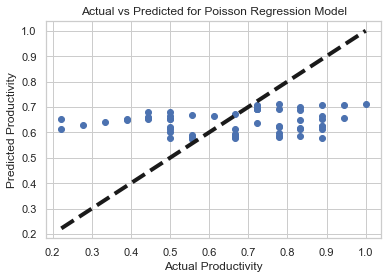

In [1014]:
plt.scatter(y_test, y_pred_poisson)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted for Poisson Regression Model")
plt.show()

In [1015]:
model_dt = DecisionTreeRegressor(random_state = 0)
model_dt.fit(x_train,y_train)
#Prediction using test set 
y_dt_pred = model_dt.predict(x_test)
# Checking with metrics
models_metrics = evaluate_model('Decision Tree Regression', y_test, y_dt_pred, models_metrics)

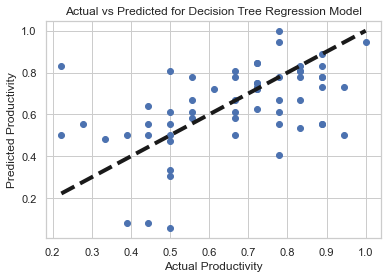

In [1016]:
plt.scatter(y_test, y_dt_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted for Decision Tree Regression Model")
plt.show()


In [1017]:
model_rf = RandomForestRegressor(n_estimators = 100 ,  random_state = 10)
model_rf.fit(x_train,y_train)
#Prediction using test set 
y_rf_pred = model_rf.predict(x_test)
# Checking with metrics
models_metrics = evaluate_model('Random Forest Regression', y_test, y_rf_pred, models_metrics)

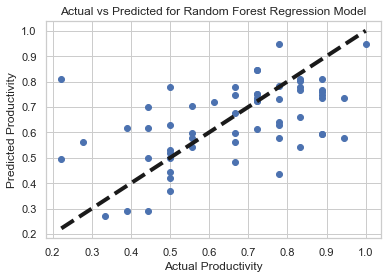

In [1018]:
plt.scatter(y_test, y_rf_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted for Random Forest Regression Model")
plt.show()

In [1019]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)

model_gbr.fit(x_train, y_train)
y_gbr_pred = model_gbr.predict(x_test)
models_metrics = evaluate_model('Gradient Boost', y_test, y_gbr_pred, models_metrics)

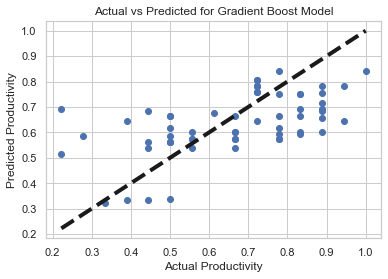

In [1020]:
plt.scatter(y_test, y_gbr_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted for Gradient Boost Model")
plt.show()


In [1021]:
models_metrics

,models,mae,mse,rmse,mape,R2
0,Linear Regression,0.128629,0.026078,0.161487,23.599696,0.279621
1,Ridge Regression,0.129176,0.026216,0.161915,23.774694,0.275793
2,Polynomial Degree 2,0.128100,0.024270,0.155788,22.811872,0.329569
3,Polynomial Degree 3,0.129457,0.024774,0.157398,23.602663,0.315640
4,Polynomial Degree 4,0.152682,0.042763,0.206792,28.932906,-0.181291
5,Support Vector Regression,0.127901,0.026037,0.161360,22.985381,0.280747
6,KNeighbour Regression def,0.142593,0.030601,0.174931,26.044935,0.154680
7,Lasso Regression,0.163517,0.036412,0.190819,31.232854,-0.005844
8,Poisson Regression,0.159966,0.036106,0.190017,30.413907,0.002592
9,Decision Tree Regression,0.148223,0.039051,0.197613,28.958055,-0.078751


In [1022]:
models_metrics['models'][2] = 'Polynomial Regression'
models_metrics['models'][3] = 'Polynomial Regression'
models_metrics['models'][4] = 'Polynomial Regression'



<ipython-input-1022-489ba2f21475>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models_metrics['models'][2] = 'Polynomial Regression'
<ipython-input-1022-489ba2f21475>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models_metrics['models'][3] = 'Polynomial Regression'
<ipython-input-1022-489ba2f21475>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models_metrics['models'][4] = 'Polynomial Regression'


In [1023]:
models_metrics

,models,mae,mse,rmse,mape,R2
0,Linear Regression,0.128629,0.026078,0.161487,23.599696,0.279621
1,Ridge Regression,0.129176,0.026216,0.161915,23.774694,0.275793
2,Polynomial Regression,0.128100,0.024270,0.155788,22.811872,0.329569
3,Polynomial Regression,0.129457,0.024774,0.157398,23.602663,0.315640
4,Polynomial Regression,0.152682,0.042763,0.206792,28.932906,-0.181291
5,Support Vector Regression,0.127901,0.026037,0.161360,22.985381,0.280747
6,KNeighbour Regression def,0.142593,0.030601,0.174931,26.044935,0.154680
7,Lasso Regression,0.163517,0.036412,0.190819,31.232854,-0.005844
8,Poisson Regression,0.159966,0.036106,0.190017,30.413907,0.002592
9,Decision Tree Regression,0.148223,0.039051,0.197613,28.958055,-0.078751


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Ridge Regression'),
  Text(2, 0, 'Polynomial Regression'),
  Text(3, 0, 'Support Vector Regression'),
  Text(4, 0, 'KNeighbour Regression def'),
  Text(5, 0, 'Lasso Regression'),
  Text(6, 0, 'Poisson Regression'),
  Text(7, 0, 'Decision Tree Regression'),
  Text(8, 0, 'Random Forest Regression'),
  Text(9, 0, 'Gradient Boost')])

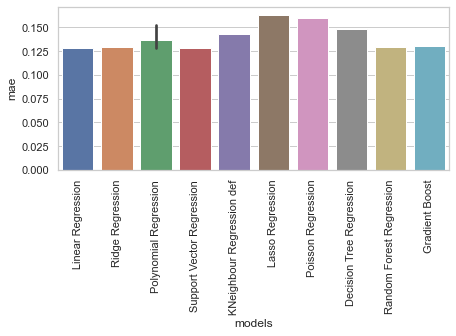

In [1024]:
import matplotlib.pyplot as plt
import seaborn as sns
plot_data = models_metrics
plt.figure(figsize=(7, 3))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="models", y="mae", data=plot_data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Ridge Regression'),
  Text(2, 0, 'Polynomial Regression'),
  Text(3, 0, 'Support Vector Regression'),
  Text(4, 0, 'KNeighbour Regression def'),
  Text(5, 0, 'Lasso Regression'),
  Text(6, 0, 'Poisson Regression'),
  Text(7, 0, 'Decision Tree Regression'),
  Text(8, 0, 'Random Forest Regression'),
  Text(9, 0, 'Gradient Boost')])

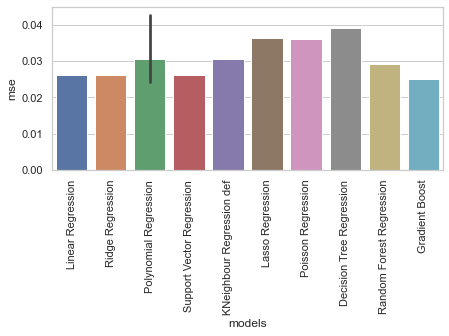

In [1025]:
import matplotlib.pyplot as plt
import seaborn as sns
plot_data = models_metrics
plt.figure(figsize=(7, 3))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="models", y="mse", data=plot_data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Ridge Regression'),
  Text(2, 0, 'Polynomial Regression'),
  Text(3, 0, 'Support Vector Regression'),
  Text(4, 0, 'KNeighbour Regression def'),
  Text(5, 0, 'Lasso Regression'),
  Text(6, 0, 'Poisson Regression'),
  Text(7, 0, 'Decision Tree Regression'),
  Text(8, 0, 'Random Forest Regression'),
  Text(9, 0, 'Gradient Boost')])

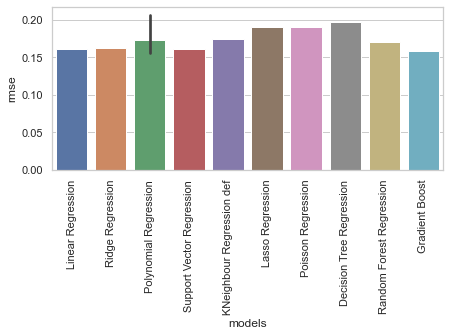

In [1026]:
import matplotlib.pyplot as plt
import seaborn as sns
plot_data = models_metrics
plt.figure(figsize=(7, 3))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="models", y="rmse", data=plot_data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Ridge Regression'),
  Text(2, 0, 'Polynomial Regression'),
  Text(3, 0, 'Support Vector Regression'),
  Text(4, 0, 'KNeighbour Regression def'),
  Text(5, 0, 'Lasso Regression'),
  Text(6, 0, 'Poisson Regression'),
  Text(7, 0, 'Decision Tree Regression'),
  Text(8, 0, 'Random Forest Regression'),
  Text(9, 0, 'Gradient Boost')])

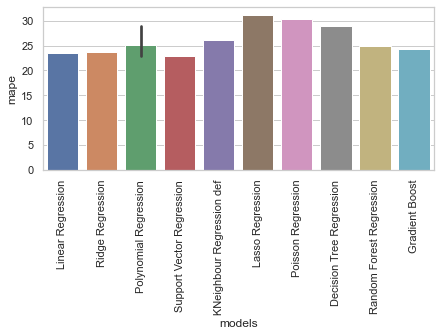

In [1027]:
import matplotlib.pyplot as plt
import seaborn as sns
plot_data = models_metrics
plt.figure(figsize=(7, 3))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="models", y="mape", data=plot_data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Ridge Regression'),
  Text(2, 0, 'Polynomial Regression'),
  Text(3, 0, 'Support Vector Regression'),
  Text(4, 0, 'KNeighbour Regression def'),
  Text(5, 0, 'Lasso Regression'),
  Text(6, 0, 'Poisson Regression'),
  Text(7, 0, 'Decision Tree Regression'),
  Text(8, 0, 'Random Forest Regression'),
  Text(9, 0, 'Gradient Boost')])

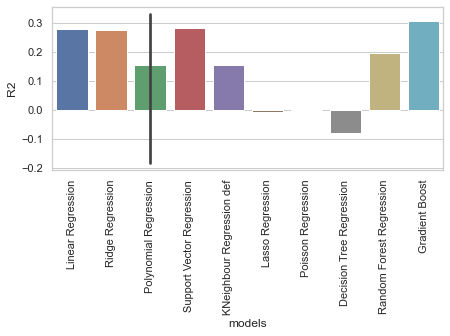

In [1028]:
import matplotlib.pyplot as plt
import seaborn as sns
plot_data = models_metrics
plt.figure(figsize=(7, 3))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="models", y="R2", data=plot_data)
plt.xticks(rotation=90)